In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
keras.backend.clear_session()  # For easy reset of Jupyter notebook


### Building the neural net

In [2]:
inputs1 = keras.Input(shape=(728,),name='in_part1')
inputs2 = keras.Input(shape=(56,),name='in_part2')
hidden_layer1_branch1 = keras.layers.Dense(64, activation='relu')(inputs1)
hidden_layer2_branch1 = keras.layers.Dense(54, activation='relu')(hidden_layer1_branch1)

hidden_layer1_branch2 = keras.layers.Dense(10, activation='relu')(inputs2)

joint1 = keras.layers.concatenate([hidden_layer2_branch1, hidden_layer1_branch2])
outputs = keras.layers.Dense(10)(joint1)

model = keras.Model(inputs=[inputs1, inputs2], outputs=outputs, name='mnist_model')
model.summary()

Model: "mnist_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
in_part1 (InputLayer)           [(None, 728)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 64)           46656       in_part1[0][0]                   
__________________________________________________________________________________________________
in_part2 (InputLayer)           [(None, 56)]         0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 54)           3510        dense[0][0]                      
________________________________________________________________________________________

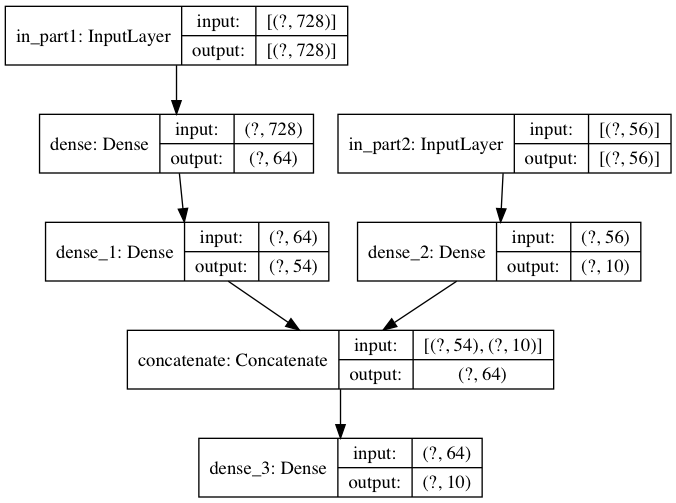

In [3]:
# this will produce a digram of the model -- requires pydot and graphviz installed (pip install pydot graphviz)
# may need to update graphviz package first (Mac: brew install graphviz/Linux: sudo apt-get install graphviz)
keras.utils.plot_model(model, to_file='model_mnist_2branches.png', show_shapes=True, show_layer_names=True)

### Set the loss function and optimizer and then train the neural net

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255


model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])
history = model.fit({'in_part1': x_train[:,:-56], 'in_part2': x_train[:,-56:]}, y_train, 
                    batch_size=64,
                    epochs=5) 
test_scores = model.evaluate({'in_part1': x_test[:,:-56], 'in_part2': x_test[:,-56:]}, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])



Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3240 - accuracy: 0.9072
Epoch 2/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1517 - accuracy: 0.9552
Epoch 3/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1120 - accuracy: 0.9672
Epoch 4/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0901 - accuracy: 0.9734
Epoch 5/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0770 - accuracy: 0.9774
10000/10000 - 0s - loss: 0.1050 - accuracy: 0.9694
Test loss: 0.10496942123696208
Test accuracy: 0.9694


### Save and Load Models

In [5]:
model.save('mnist_trained_5epochs.hdf5')

model2 = keras.models.load_model('mnist_trained_5epochs.hdf5')

### Prediction from the saved model

In [6]:
y_test_predict_p = model2.predict([x_test[:,:-56], x_test[:,-56:]])
y_test_predict = np.argmax(y_test_predict_p, axis=1)
acc = np.sum(y_test_predict == y_test)/ y_test.shape[0]


print(y_test_predict_p)
print(y_test_predict)
print(acc)

[[ -7.3803134   -8.110057    -3.799649   ...   4.7953587   -5.2901454
   -5.5472717 ]
 [-12.808779    -4.063038     6.995732   ... -25.275269    -8.539287
  -24.165915  ]
 [-11.644638     5.3246574   -3.0730793  ...  -1.0658286   -4.2470555
   -9.031616  ]
 ...
 [-13.272719   -13.235652   -10.850583   ...  -4.7852545   -5.118193
   -5.129109  ]
 [ -9.840959    -6.936616   -16.113405   ... -12.102631    -0.06150391
  -16.12829   ]
 [ -7.06574    -18.235552    -4.8564887  ... -19.043036   -11.196844
  -17.064707  ]]
[7 2 1 ... 4 5 6]
0.9694
